$H_0: a=0$

In [1]:
import numpy as np

# y = np.load('/scratch/lllei/inf1050_loc240/train/elf/distance_only/debug_481/inc_t.npy')
# x = np.load('/scratch/lllei/inf1050_loc240/train/elf/distance_only/debug_481/inc_p.npy')

# print('inc_t shape:', y.shape)
# print('inc_p shape:', x.shape)

In [35]:
a = np.load('elf.npy')
# var_y = np.sum((y-a*x)**2)/(x.shape[0]-2)
# std_a = (var_y / np.sum(x**2, axis=0)) ** 0.5 

# z_value = (a-0) / std_a

# ztest = abs(z_value) >= 1.282

# a_ztest = np.array([a[i] if (ztest[i]==True) and (i<200) else 0 for i in range(len(a))])
a_ztest = np.array([a[i] if i<225 else 0 for i in range(len(a))])


In [36]:
np.save('elf_ztest.npy', a_ztest)

<IPython.core.display.Javascript object>


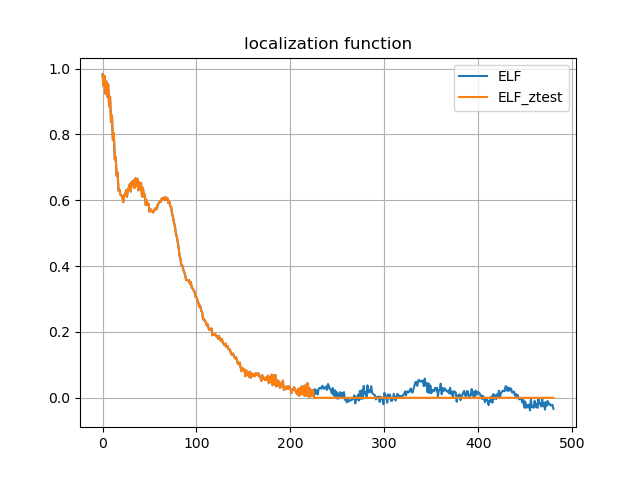

In [38]:
%matplotlib notebook
import sys
sys.path.append('/Users/ree/Documents/DataAssimilization/AI_localization/L05/git_repo/general')
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1


elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')

plt.plot(range(loc_size), elf, label='ELF')
plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.show()

## cat GC tail

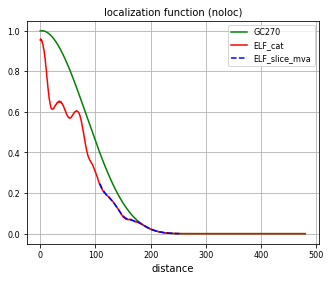

In [59]:
%matplotlib inline
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1
gclen = 270
CMat = construct_GC_2d(gclen, model_size, obs_grids)

elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')
elf_mva = np.load('elf_mva.npy')
cat_ass = 180
elf_cat = np.concatenate((elf_mva[0:cat_ass],CMat[0, cat_ass:loc_size]),axis=0)

stride = 17
mvlen = 80
elf_slice = elf_cat[cat_ass-mvlen:cat_ass+mvlen+1]
elf_slice_mva = moving_average(elf_slice,stride)
elf_cat_mva = np.concatenate((elf_cat[0:cat_ass-mvlen+int((stride-1)/2)],elf_slice_mva,elf_cat[cat_ass+mvlen+1-int((stride-1)/2):]),axis=0)

plt.plot(range(loc_size), CMat[0, 0:loc_size], color='g',label='GC{0:d}'.format(gclen))
# plt.plot(range(loc_size), elf, label='ELF')
# plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.plot(range(loc_size), elf_cat, color='red',label='ELF_cat')
plt.plot(range(cat_ass-mvlen+int((stride-1)/2),cat_ass+mvlen+1-int((stride-1)/2)), elf_slice_mva, 'b--',label='ELF_slice_mva')
plt.title('localization function (noloc)')
plt.xlabel('distance')
plt.legend()
plt.grid(True)
plt.subplots_adjust(top=0.9,right=0.8)# show the figure

# plt.show()
plt.savefig('elf_cat_mva.png',dpi=150)

In [55]:
np.save('elf_cat.npy', elf_cat_mva)

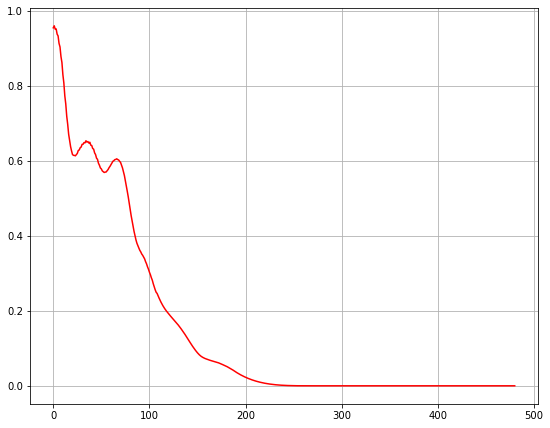

In [56]:
elf_cat = np.load('elf_cat.npy')
plt.plot(range(loc_size), elf_cat, color='red',label='ELF_cat')
plt.grid(True)
plt.subplots_adjust(top=1.5,right=1.3)# show the figure
plt.show()

## moving average

In [3]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w



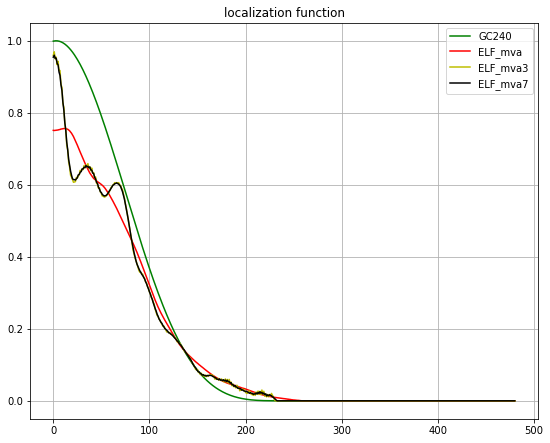

In [16]:
%matplotlib inline

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1
CMat = construct_GC_2d(240, model_size, obs_grids)


elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')
# elf_cat = np.concatenate((elf_ztest[0:130],CMat[0, 130:loc_size]),axis=0)

stride = 59
elf_extend = np.concatenate((elf_ztest[int((stride-1)/2):0:-1], elf_ztest, elf_ztest[-2:-2-int((stride-1)/2):-1]), axis=0)
elf_mva = moving_average(elf_extend,stride)
stride = 3
elf_extend = np.concatenate((elf_ztest[int((stride-1)/2):0:-1], elf_ztest, elf_ztest[-2:-2-int((stride-1)/2):-1]), axis=0)
elf_mva3 = moving_average(elf_extend,stride)
stride = 7
elf_extend = np.concatenate((elf_ztest[int((stride-1)/2):0:-1], elf_ztest, elf_ztest[-2:-2-int((stride-1)/2):-1]), axis=0)
elf_mva7 = moving_average(elf_extend,stride)

plt.plot(range(loc_size), CMat[0, 0:loc_size], color='g',label='GC240')
# plt.plot(range(loc_size), elf, label='ELF')
# plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.plot(range(loc_size), elf_mva, color='red',label='ELF_mva')
plt.plot(range(loc_size), elf_mva3, color='y',label='ELF_mva3')
plt.plot(range(loc_size), elf_mva7, color='k',label='ELF_mva7')
# plt.plot(range(loc_size), elf_cat, color='red',label='ELF_cat')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.subplots_adjust(top=1.5,right=1.3)# show the figure
plt.show()

In [17]:
np.save('elf_mva.npy', elf_mva7)

In [17]:
np.save('elf_mva59.npy', elf_mva)

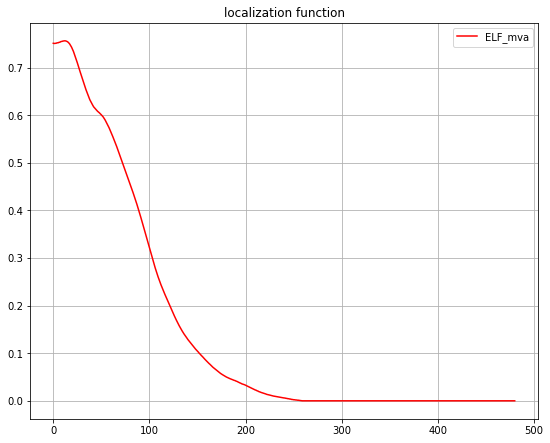

In [18]:
elf_mva = np.load('elf_mva59.npy')
plt.plot(range(loc_size), elf_mva, color='red',label='ELF_mva')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.subplots_adjust(top=1.5,right=1.3)# show the figure
plt.show()

## different average width

<IPython.core.display.Javascript object>


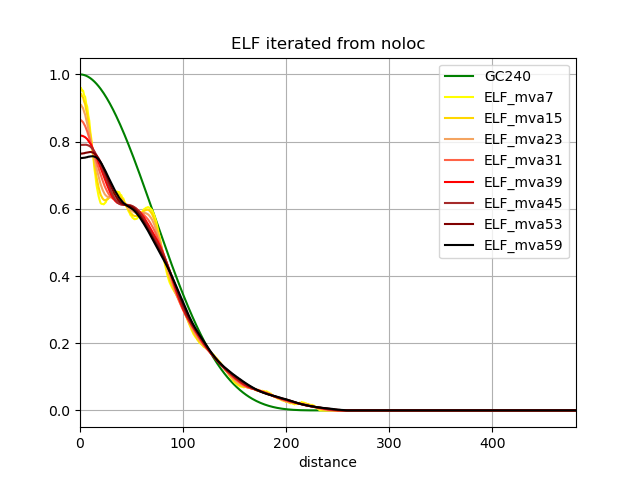

In [1]:
%matplotlib notebook
import sys
sys.path.append('/Users/ree/Documents/DataAssimilization/AI_localization/L05/git_repo/general')
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1
CMat = construct_GC_2d(240, model_size, obs_grids)

elf0 = np.load('./elf_mva.npy')
elf1 = np.load('./elf_mva15.npy')
elf2 = np.load('./elf_mva23.npy')
elf3 = np.load('./elf_mva31.npy')
elf4 = np.load('./elf_mva39.npy')
elf5 = np.load('./elf_mva45.npy')
elf6 = np.load('./elf_mva53.npy')
elf7 = np.load('./elf_mva59.npy')

plt.plot(range(loc_size), CMat[0, 3:loc_size+3], color='g',label='GC240')
plt.plot(range(loc_size), elf0, color='yellow',label='ELF_mva7')
plt.plot(range(loc_size), elf1, color='gold',label='ELF_mva15')
plt.plot(range(loc_size), elf2, color='sandybrown',label='ELF_mva23')
plt.plot(range(loc_size), elf3, color='tomato',label='ELF_mva31')
plt.plot(range(loc_size), elf4, color='red',label='ELF_mva39')
plt.plot(range(loc_size), elf5, color='brown',label='ELF_mva45')
plt.plot(range(loc_size), elf6, color='maroon',label='ELF_mva53')
plt.plot(range(loc_size), elf7, color='black',label='ELF_mva59')
plt.xlabel('distance')
plt.xlim(0,481)
plt.title('ELF iterated from noloc')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('elf0_noloc_avwids.png')

## smoothing splines

<IPython.core.display.Javascript object>


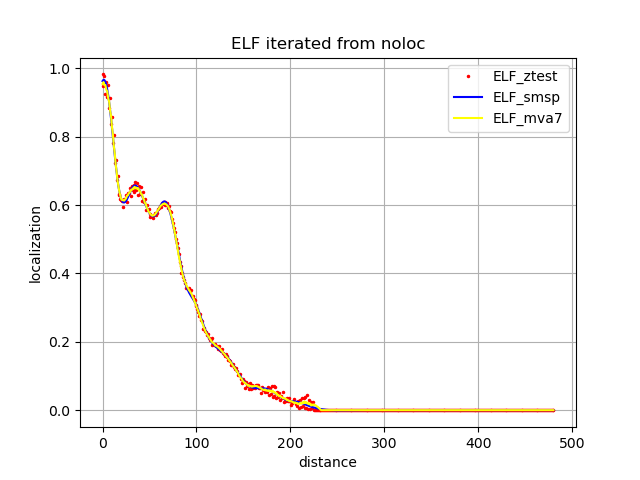

In [20]:
%matplotlib notebook
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt


elf_ztest = np.load('elf_ztest.npy')
elf_mva7 = np.load('elf_mva.npy')

loc_size=481
fitrange = 350
x = np.array(range(fitrange))
y = elf_ztest[:fitrange]

spl = UnivariateSpline(x, y,s=0.025)
y_smsp = spl(x)

elf_smsp = np.concatenate((y_smsp, elf_ztest[fitrange:]),axis=0)
xs = np.array(range(loc_size))
plt.plot(xs, elf_ztest, 'ro', ms=1.5, label='ELF_ztest')
plt.plot(xs, elf_smsp, 'b', lw=1.5, label='ELF_smsp')
plt.plot(xs, elf_mva7, color='yellow',label='ELF_mva7')
plt.grid(True)
plt.title('ELF iterated from noloc')
plt.legend()
plt.xlabel('distance')
plt.ylabel('localization')
plt.show()
# plt.savefig('elf_smsp.png')

In [18]:
np.save('elf_smsp.npy', elf_smsp)